<a href="https://colab.research.google.com/github/Caduescanti/Regressao-alugueis-de-bikes/blob/main/iRegressao_em_alugueis_de_bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise Estatística

**Nome:** Carlos Eduardo Mora Santos  
**Disciplina:** Modelagem Estatística  
**Matrícula:** 514072  
**Nome:** José Enilson Mesquita da Silva
**Matrícula:**497562

---

## Objetivo
O objetivo deste estudo é analisar os fatores que influenciam o número de bicicletas alugadas diariamente por meio de um modelo linear tradicional. A análise busca responder questões como:

1. O impacto da temperatura no número de aluguéis.
2. O efeito dos feriados em comparação a dias normais.
3. A relação entre a velocidade do vento e o número de bicicletas alugadas.

---


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
df = pd.read_csv('day.csv')
display(df.head())


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


pre-processamento

In [ ]:
# Resumo estatístico
display(df.describe())
# Identificar valores ausentes
display(df.isnull().sum())



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


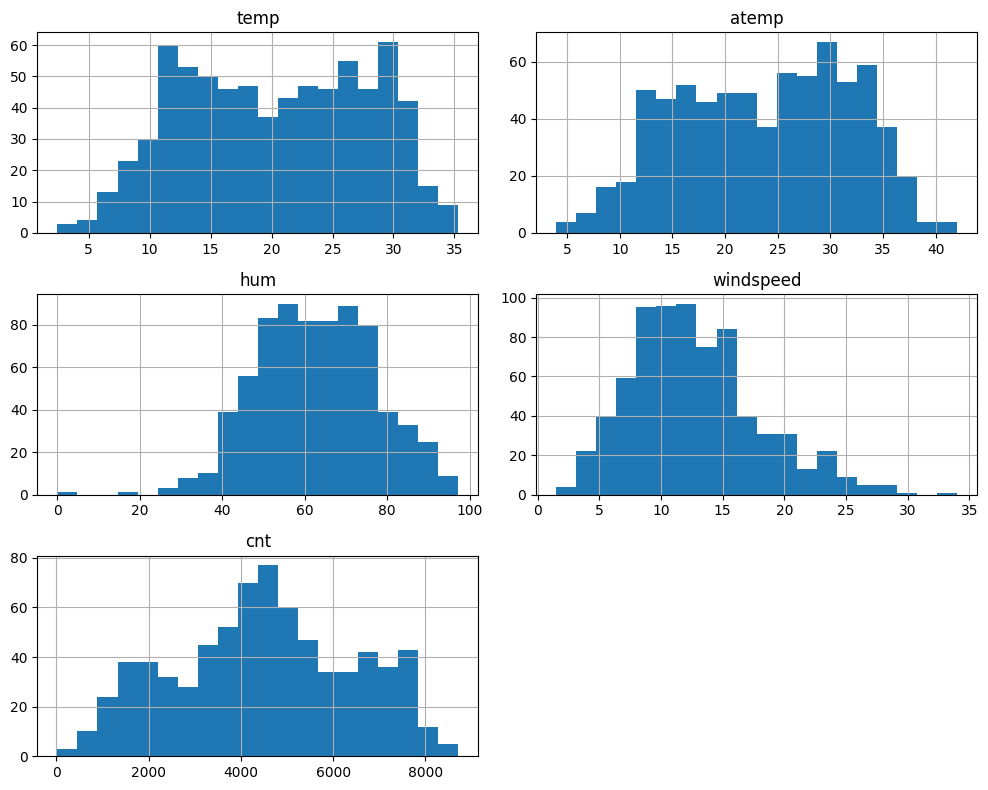

In [ ]:
# Histogramas das variáveis numéricas com as distribuiçoes das variaveis
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


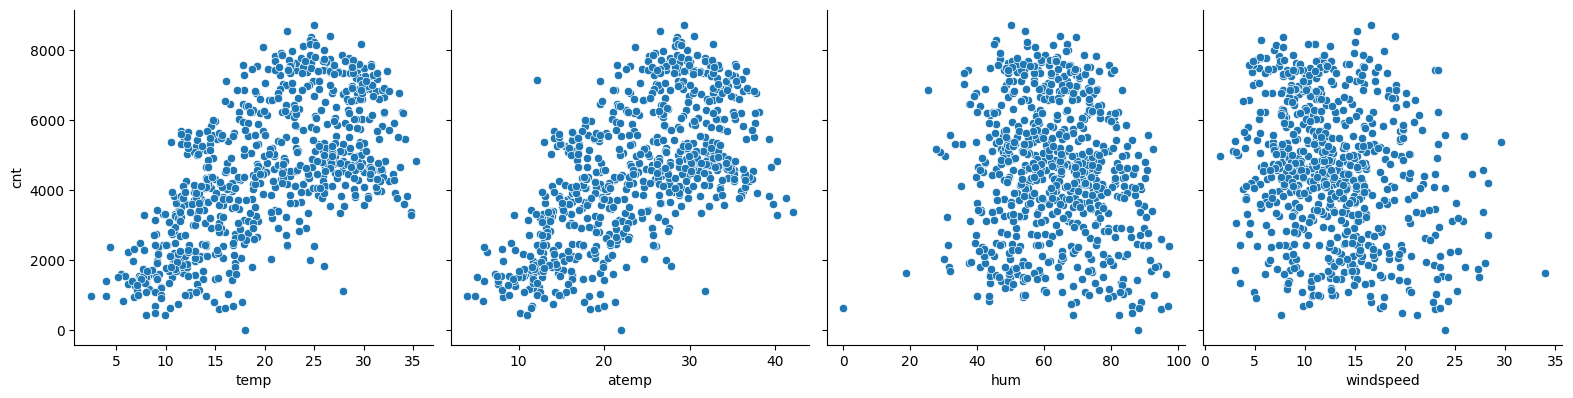

In [ ]:
#relação entre a variável dependente (cnt) e as explicativas.
# Scatter plots para variáveis contínuas
sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', height=4)
plt.show()


In [ ]:
sns.set(style="whitegrid")

numerical_summary = df.describe()

In [ ]:
# Estatísticas descritivas para variáveis numéricas
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
stats_summary = df[numeric_columns].describe()
display(stats_summary)

# Incluindo a mediana para análise adicional
median_values = df[numeric_columns].median()
display("\nMedianas das variáveis:")
display(median_values)


,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


'\nMedianas das variáveis:'

,0
temp,20.465826
atemp,24.368225
hum,62.625000
windspeed,12.125325
casual,717.000000
registered,3664.500000
cnt,4548.500000


usando count para analisar

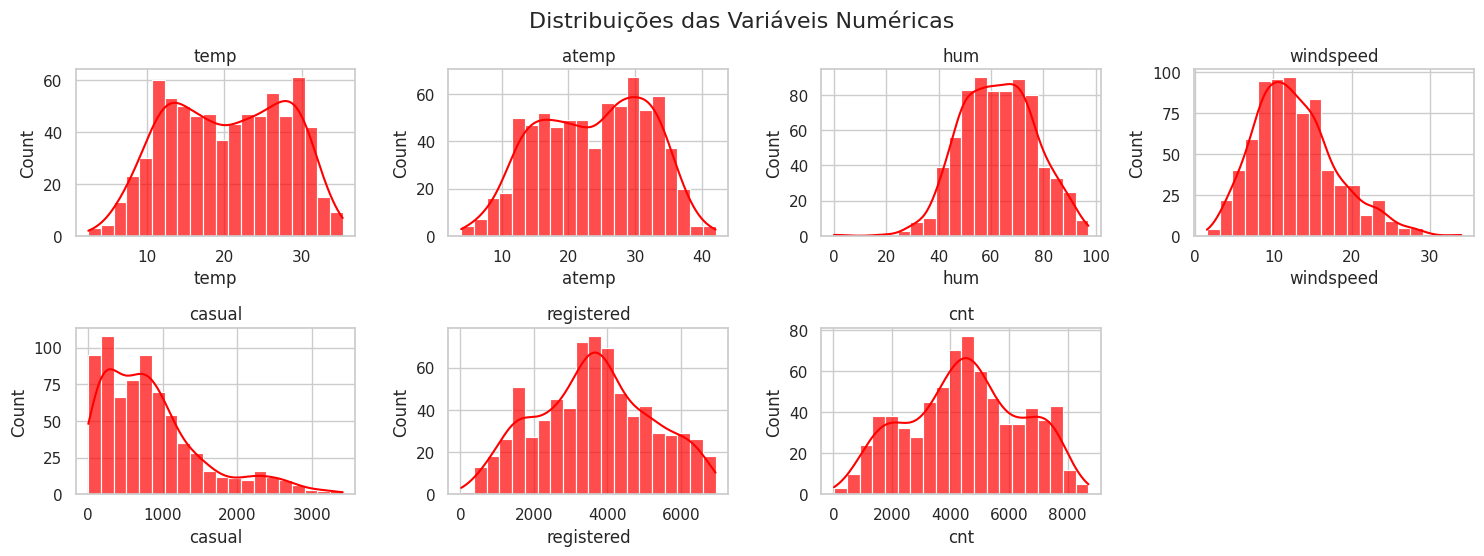

In [ ]:
def plot_distributions(data, columns, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 4, i)
        sns.histplot(df[column], kde=True, bins=20, color='red', alpha=0.7)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# Distribuições das variáveis explicativas
exploratory_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plot_distributions(df, exploratory_columns, "Distribuições das Variáveis Numéricas")

contagem total de bicicletas alugadas e as outras variáveis possuem uma correlação.

Quando ocorre determinado evento, é facil perceber que a contagem total pode aumentar ou diminuir da forma que acontece o evento.

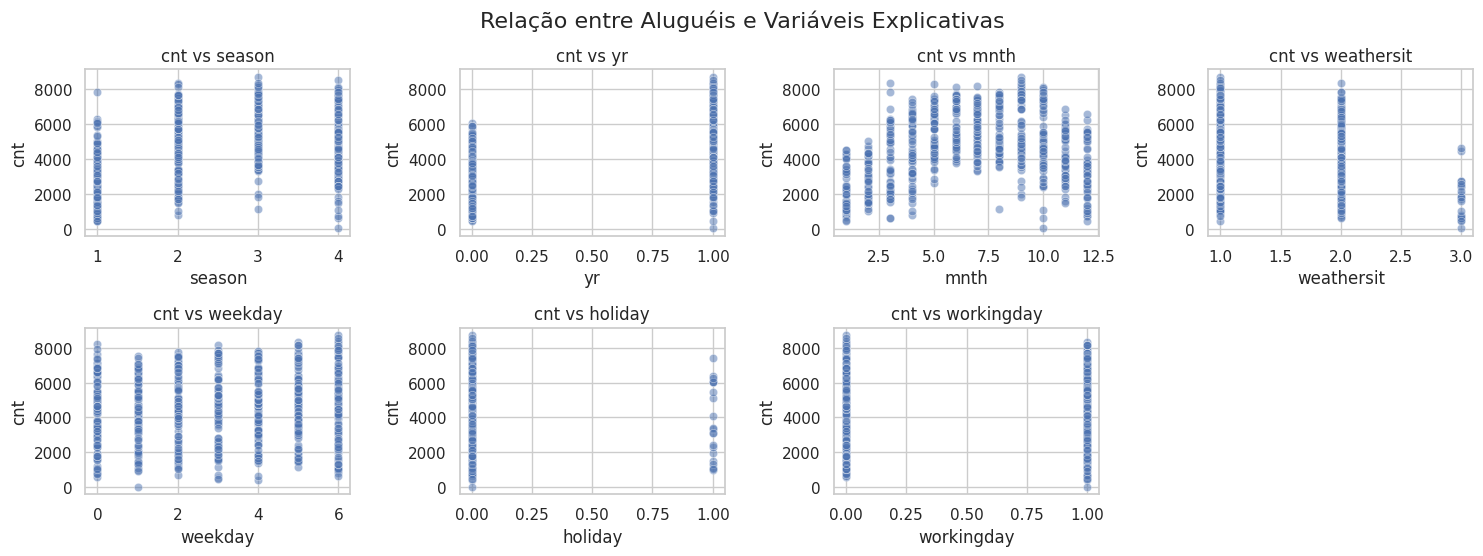

In [ ]:
def plot_relationships(data, x_vars, y_var, title):
    plt.figure(figsize=(15, 10))
    for i, x_var in enumerate(x_vars, 1):
        plt.subplot(4, 4, i)
        sns.scatterplot(data=data, x=x_var, y=y_var, alpha=0.5)
        plt.title(f'{y_var} vs {x_var}')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

relationship_columns = ['season', 'yr', 'mnth', 'weathersit', 'weekday', 'holiday', 'workingday']
plot_relationships(df, relationship_columns, 'cnt', "Relação entre Aluguéis e Variáveis Explicativas")

 Verificando Valores Faltantes e Tipos de Dados

In [ ]:
# Verificar valores ausentes
print("Valores ausentes em cada coluna:")
print(df.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Valores ausentes em cada coluna:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipos de dados:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


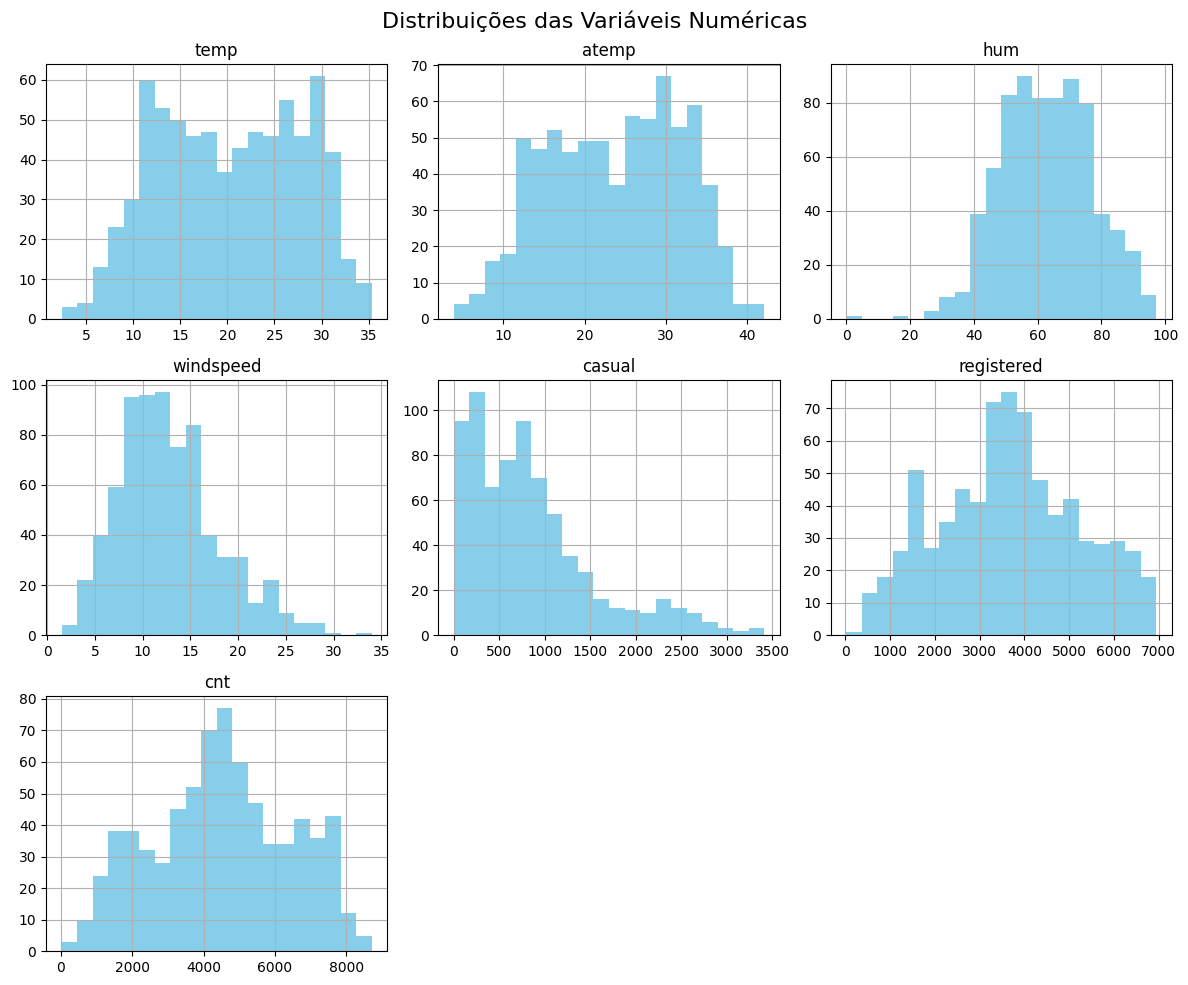

In [ ]:
# Histogramas para as variáveis numéricas
df[numeric_columns].hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle("Distribuições das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()



A relação "count" em relação as variáveis explicativas é possível entender quais eventos, dias, meses possuem um maior número de aluguel de bikes.

In [ ]:
numerical_summary

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
import altair as alt
alt.Chart(numerical_summary).mark_circle().encode(
    x='casual',
    y='registered',
    color='season'
).interactive()


alt.Chart(...)

Os dados analisados correspondem ao aluguel diário de bicicletas, incluindo variáveis climáticas, sazonais e categóricas.

A tabela abaixo é uma representação melhor visualizada do resumo estatístico apresentado acima.


| Variável | Média | Mediana | Desvio Padrão | Mínimo | Máximo |
|---|---|---|---|---|---|
| Temperatura (temp) | 20.32°C | 20.47°C | 7.51°C | 2.42°C | 35.33°C |
| Sensação Térmica (atemp) | 23.73°C | 24.37°C | 8.15°C | 3.95°C | 42.04°C |
| Umidade (hum) | 62.77% | 62.63% | 14.24% | 0% | 97.25% |
| Velocidade do Vento (windspeed) | 12.76 | 12.13 | 5.20 | 1.50 | 34.00 |
| Usuários Casuais (casual) | 849.25 | 717.00 | 686.48 | 2 | 3410 |
| Usuários Registrados (registered) | 3658.76 | 3664.50 | 1559.76 | 20 | 6946 |
| Total de Aluguéis (cnt) | 4508.01 | 4548.50 | 1936.01 | 22 | 8714 |

Relação de cnt com variáveis explicativas:
Por exemplo, temp (temperatura):

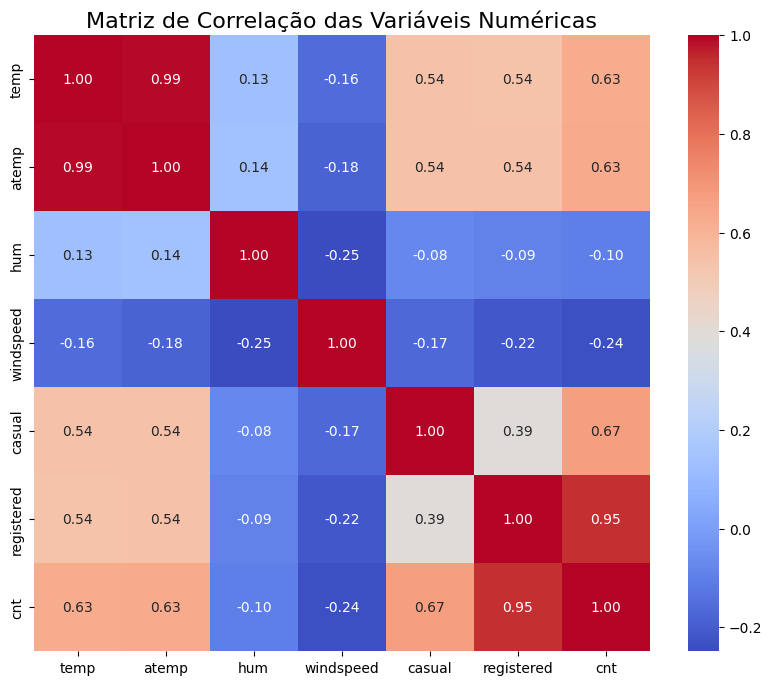

In [ ]:
#Correlações Entre Variáveis
# Matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()


2

cnt=β
0
​
 +β
1
​
 ⋅temp+β
2
​
 ⋅hum+β
3
​
 ⋅windspeed+β
4
​
 ⋅holiday+β
5
​
 ⋅season+β
6
​
 ⋅workingday+β
7
​
 ⋅weathersit+ϵ

1. **Variáveis Climáticas:**
   - temp (temperatura): Observou-se uma forte relação positiva entre temperatura e número de aluguéis.
   - atemp (sensação térmica): Reflete a percepção do clima pelos usuários, complementando a temperatura.
   - hum (umidade): Pode impactar negativamente o uso de bicicletas, especialmente em dias muito úmidos.
   - windspeed (velocidade do vento): Dias com ventos fortes podem desencorajar os usuários.

2. **Variáveis Categóricas:**
   - holiday: Feriados mostraram diferenças no padrão de aluguéis, especialmente para usuários casuais.
   - workingday: Indica se o dia é útil, capturando padrões de uso por usuários registrados.
   - weathersit: Classificação das condições climáticas (ex.: céu limpo, chuva leve), com impacto direto na decisão de alugar bicicletas.
   - season: Captura padrões sazonais de uso (ex.: primavera pode ter maior uso devido ao clima agradável).
   - weekday: Considera a influência do dia da semana, como fins de semana e dias úteis.

3. **Interação de Variáveis:**
   - É possível considerar interações, como entre workingday e temp, já que o clima pode impactar de forma diferente em dias úteis e finais de semana.

### Método de Seleção de Variáveis

Caso haja correlações altas entre variáveis explicativas (como temp e atemp), será aplicado o método **stepwise** para selecionar as mais relevantes, balanceando complexidade e poder explicativo do modelo.


usando o metodo stepwise

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Preparar os dados para o modelo
X =df[['temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday', 'weathersit', 'season', 'weekday']]
y =df['cnt']

# Adicionar a constante para o modelo
X = add_constant(X)

# Função para aplicar o método stepwise
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10):
    """Perform a stepwise selection based on p-values."""
    included = list(initial_list)
    while True:
        changed = False

        # Forward step: tentar incluir variáveis
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Backward step: tentar excluir variáveis
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclui o intercepto
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True

        if not changed:
            break

    return included

# Aplicar o método stepwise
selected_features = stepwise_selection(X, y)

# Ajustar o modelo final com as variáveis selecionadas
final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()

# Resumo do modelo e variáveis selecionadas
selected_features, final_model.summary()




(['const', 'atemp', 'weathersit', 'season', 'hum', 'windspeed', 'weekday'],
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.522
 Model:                            OLS   Adj. R-squared:                  0.518
 Method:                 Least Squares   F-statistic:                     131.7
 Date:                Sat, 25 Jan 2025   Prob (F-statistic):          2.04e-112
 Time:                        15:00:28   Log-Likelihood:                -6290.7
 No. Observations:                 730   AIC:                         1.260e+04
 Df Residuals:                     723   BIC:                         1.263e+04
 Df Model:                           6                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0

Cada linha representa uma variável incluída no modelo, com seus respectivos coeficientes (coef) e significâncias:

**const (Intercepto):** 2962.2671
Representa o número de aluguéis esperados q

**atemp (Sensação térmica):** 127.8128
Para cada unidade adicional de sensação térmica, o número de aluguéis aumenta em média em 127,82

**weathersit (Condição climática):** -469.5081
Indica que condições climáticas mais adversas  estão associadas a uma redução média de 469,51 n.

**season (Estação):** 403.5404
A variação entre estações influencia positivamente o número de aluguéis em média.

**hum (Umidade):** -23.3109
Cada aumento de 1 unidade na umidade reduz, em média, 23,31 aluguéis.

**windspeed (Velocidade do vento):** -45.2334
Ventos mais fortes estão associados a uma redução de 45,23 aluguéis, em média.

**weekday (Dia da semana):** 66.7647
Os aluguéis tendem a variar em função do dia da semana, com um aumento médio de 66,76 em dias úteis.

###3. Significância das Variáveis
**P>|t|:** Mostra a significância estatística de cada variável (valores abaixo de 0.05 são considerados significativos):

Todas as variáveis incluídas são significativas (p-valor < 0.05), indicando que elas contribuem para explicar a variabilidade de cnt.

###4. Qualidade do Modelo
**AIC (Akaike Information Criterion):** 12630.0
Uma métrica usada para avaliar a qualidade do modelo, penalizando a complexidade. Valores menores indicam melhores modelos.
**BIC (Bayesian Information Criterion):** 12657.0
Semelhante ao AIC, mas penaliza mais severamente modelos complexos.

Estatísticas de Diagnóstico
**Durbin-Watson:** 0.396
Mede a autocorrelação dos resíduos. Valores próximos de 2 indicam ausência de autocorrelação. Aqui, o valor indica uma possível correlação positiva nos resíduos.

**Omnibus, Prob(Omnibus), Skew, Kurtosis:** Diagnósticos de normalidade dos resíduos. Pequenos desvios da normalidade são indicados, mas geralmente não são graves.

Variáveis Selecionadas
O método stepwise selecionou as variáveis com maior impacto na explicação de cnt:

**atemp:** Sensação térmica está fortemente correlacionada com o número de aluguéis.

**weathersit:** Condições climáticas ruins reduzem significativamente os aluguéis.

**season:** As estações do ano influenciam padrões sazonais de uso.
hum: Alta umidade tende a desestimular o uso de bicicletas.

**windspeed:** Ventos fortes reduzem o número de aluguéis.

Avalie a qualidade do modelo ajustado:
  * Analise os resıduos do modelo (gráficos de resíduos).

  * Interprete o coeficiente de determinação R2.

  * Comente sobre a validade das suposicãoes do modelo linear (normalidade, homocedasticidade, etc.)

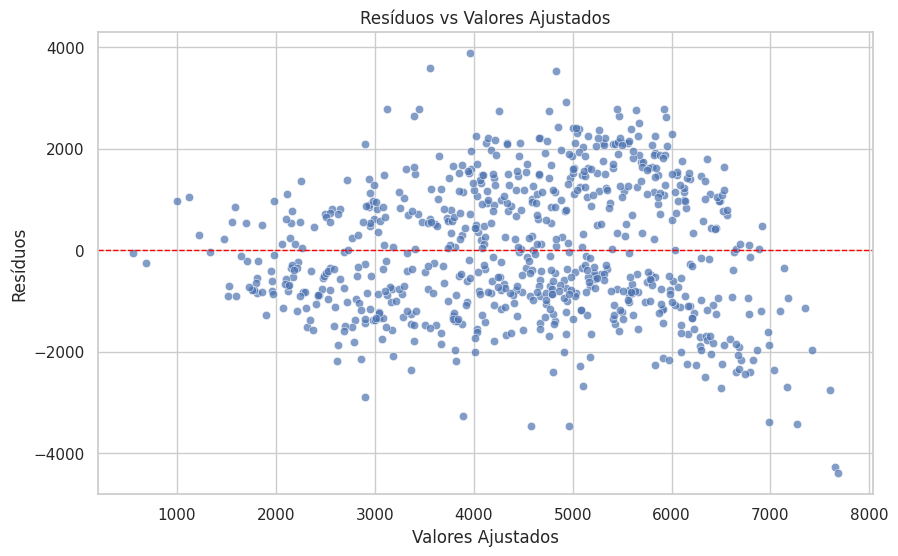

In [ ]:
residuals = final_model.resid
fitted_values = final_model.fittedvalues
# Gráfico de resíduos vs valores ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Resíduos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

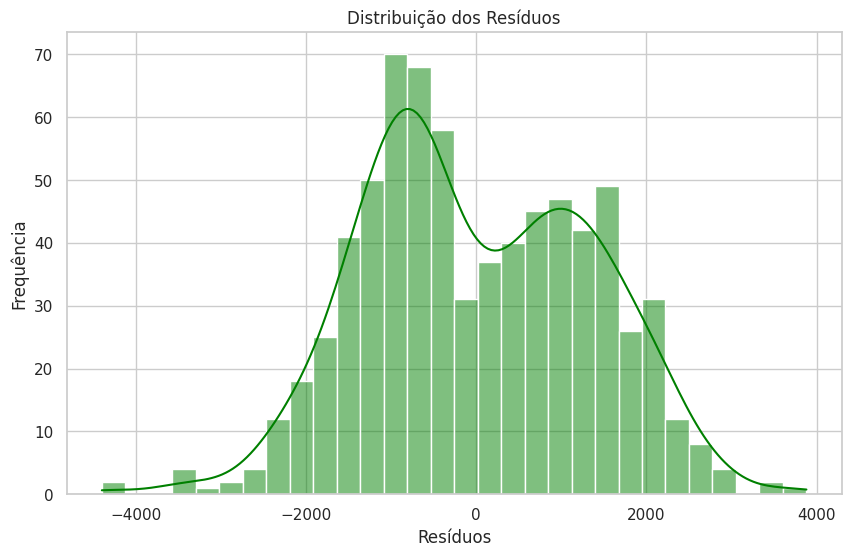

In [ ]:
#  Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

Histograma dos resíduos: O histograma dos resíduos (já incluído no código) nos dá uma ideia visual da distribuição dos resíduos. Uma distribuição aproximadamente normal é desejável.
Teste de Shapiro-Wilk : Para uma avaliação mais formal, podemos utilizar o teste de Shapiro-Wilk para verificar se os resíduos seguem uma distribuição normal.  A hipótese nula do teste é que os dados são normalmente distribuídos. Um p-valor baixo (tipicamente abaixo de 0.05) indica que rejeitamos a hipótese nula, sugerindo que os resíduos não são normalmente distribuídos.


Normalidade: Transformações das variáveis (logarítmica, Box-Cox)
Heterocedasticidade: Transformações das variáveis, ponderação dos dados, modelagem robusta.

Coeficientes: Para cada variável independente, analise o coeficiente, seu erro padrão, e o p-valor.  O p-valor indica se o coeficiente é estatisticamente significativo (abaixo de um limiar, como 0.05). Um coeficiente significativo sugere que a variável está relacionada à variável dependente.
 R-squared: Um valor alto sugere que o modelo explica bem a variação na variável dependente. No entanto, um valor alto não garante que o modelo é bom, pois o modelo pode ser sobreajustado.

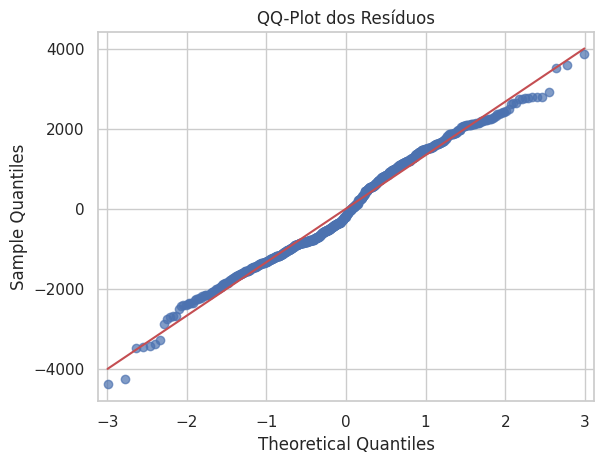

In [ ]:
# Gráfico QQ-plot (normalidade dos resíduos)
sm.qqplot(residuals, line='s', alpha=0.7)
plt.title("QQ-Plot dos Resíduos")
plt.show()

In [ ]:
shapiro_test = shapiro(residuals)
print("Teste de Shapiro-Wilk:")
print(f"Estatística: {shapiro_test[0]}")
print(f"p-valor: {shapiro_test[1]}")

Teste de Shapiro-Wilk:
Estatística: 0.9871839917789446
p-valor: 5.2164885635469885e-06


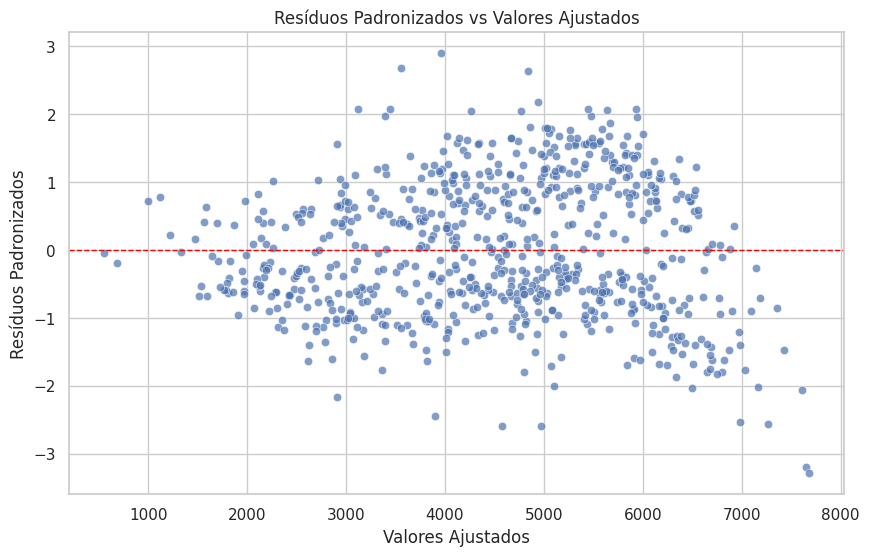

In [ ]:
#Teste de homocedasticidade: Resíduos padronizados vs Valores Ajustados
standardized_residuals = residuals / np.std(residuals)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Resíduos Padronizados vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Padronizados")
plt.show()


Interpretação dos Efeitos Estimados

Impacto da Temperatura no Número de Aluguéis (atemp)
O coeficiente estimado para atemp (sensação térmica) é 127.81.



 cada aumento de uma unidade na sensação térmica, o número médio de aluguéis aumenta em 127,81 bicicletas, mantendo todas as outras variáveis constantes.
 possivelmente porque o clima mais confortável é mais favorável para atividades ao ar livre.

Impacto de Feriados nos Aluguéis (holiday)
Embora a variável holiday tenha sido considerada no início, o método stepwise a excluiu, indicando que sua contribuição para explicar o número de aluguéis não era estatisticamente significativa. Isso pode indicar que
 Dias de feriado não têm um impacto considerável no número de aluguéis em comparação com dias normais.
  

Relação entre Velocidade do Vento e Número de Aluguéis (windspeed)
O coeficiente estimado para windspeed (velocidade do vento) é -45.23. Isso indica que

  *  cada aumento de uma unidade na velocidade do vento, o número médio de aluguéis diminui em 45,23 bicicletas, mantendo as demais variáveis constantes.
  * A relação é negativa e estatisticamente significativa, sugerindo que ventos mais fortes desestimulam o uso de bicicletas.

**atemp**: impacto positivo no número de aluguéis.

**holiday**: Não apresenta relação clara ou significativa com o número de aluguéis.

**windspeed**: Impacto negativo, com redução no uso de bicicletas em condições de ventos mais fortes.